In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
import pandas as pd
from datetime import timedelta, datetime

In [31]:
import ast

## World Ocean Atlas (WOA):

In [ ]:
#Url to access the web:
url1 = 'https://www.ncei.noaa.gov/data/oceans/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc'
#Url to access data from Python: 
url2 = 'https://data.nodc.noaa.gov/thredds/dodsC/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc'
ds = xr.open_dataset(url2, decode_times=False)

In [ ]:
url_root = 'https://data.nodc.noaa.gov/thredds/dodsC/ncei/woa/oxygen/all/1.00/'
file_name = 'woa18_all_o00_01.nc'
ds = xr.open_dataset(url_root+file_name, 
                     decode_times=False)

In [ ]:
for x in ds.variables.keys():
    if 'o_' in x:
        print(x, ds[x].long_name)

In [ ]:
ds['o_mn'].mean(dim=['time','depth']).plot()

## World Ocean Data (WOD):

In [6]:
def request_data_from_url(year, sensor_type='ctd'):
    """
    Input: year and sensor type (ctd as the default choice)
    Output: xarray data from url (root: https://data.nodc.noaa.gov/thredds/dodsC/ncei/wod/)
    """
    url_root = 'https://data.nodc.noaa.gov/thredds/dodsC/ncei/wod/'
    file_name = f'/wod_{sensor_type}_{year}.nc'
    try: 
        ds = xr.open_dataset(url_root + str(year) + file_name, 
            decode_times=False)
    except OSError:
        print(f'{year}: No {sensor_type} data')
        ds = 0
        pass
    return ds

In [3]:
ds2 = request_data_from_url(year=2018, sensor_type='ctd')
ds2

<xarray.Dataset>
Dimensions:                         (casts: 22618, z_obs: 4129661, Temperature_obs: 4129636, Salinity_obs: 4089958, Oxygen_obs: 2566627, Chlorophyll_obs: 1604001, Pressure_obs: 3514144, Nitrate_obs: 17953, numberofpis: 140)
Coordinates:
    lat                             (casts) float32 ...
    lon                             (casts) float32 ...
    time                            (casts) float64 ...
    z                               (z_obs) float32 ...
Dimensions without coordinates: casts, z_obs, Temperature_obs, Salinity_obs, Oxygen_obs, Chlorophyll_obs, Pressure_obs, Nitrate_obs, numberofpis
Data variables: (12/75)
    country                         (casts) |S64 ...
    WOD_cruise_identifier           (casts) |S64 ...
    originators_cruise_identifier   (casts) |S64 ...
    wod_unique_cast                 (casts) int32 ...
    originators_station_identifier  (casts) |S64 ...
    date                            (casts) int32 ...
    ...                              ...
    Nitrate_WODprofileflag          (casts) int8 ...
    Nitrate_contains_nitrite        (casts) |S64 ...
    Primary_Investigator            (numberofpis) |S64 ...
    Primary_Investigator_VAR        (numberofpis) |S64 ...
    Primary_Investigator_row_size   (casts) float64 ...
    crs                             int32 ...
Attributes: (12/40)
    institution:                   National Centers for Environmental Informa...
    source:                        World Ocean Database
    references:                    World Ocean Database 2018. URL:http://data...
    title:                         World Ocean Database - Multi-cast file
    summary:                       Data for multiple casts from the World Oce...
    id:                            /nodc/data/OCLAB/OCL/retrieval/monthlies/w...
    ...                            ...
    standard_name_vocabulary:      CF Standard Name Table v41
    featureType:                   Profile
    cdm_data_type:                 Profile
    Conventions:                   CF-1.6
    DODS.strlen:                   40
    DODS.dimName:                  strnlensmall

In [4]:
for x in ds2.keys():
    if 'Oxygen' in x:
        print(x, ds2[x].values.shape)
        
for x in ['lat', 'lon', 'time', 'z']:
    print(x, ds2[x].values.shape)

Oxygen (2566627,)
Oxygen_sigfigs (2566627,)
Oxygen_row_size (22618,)
Oxygen_WODflag (2566627,)
Oxygen_origflag (2566627,)
Oxygen_WODprofileflag (22618,)
Oxygen_Instrument (22618,)
Oxygen_Original_units (22618,)
lat (22618,)
lon (22618,)
time (22618,)
z (4129661,)


In [5]:
ds3 = request_data_from_url(year=2018, sensor_type='pfl')
ds3.dims

Frozen({'casts': 176676, 'z_obs': 88925764, 'Temperature_obs': 88925621, 'Salinity_obs': 88904913, 'Pressure_obs': 88925764, 'Oxygen_obs': 9280272, 'Nitrate_obs': 4130029, 'pH_obs': 2333143, 'Chlorophyll_obs': 7991367, 'numberofpis': 205166})

In [6]:
for x in ds3.keys():
    if 'Oxygen' in x:
        print(x, ds3[x].values.shape)
        
for x in ['lat', 'lon', 'time', 'z']:
    print(x, ds3[x].values.shape)

Oxygen (9280272,)
Oxygen_sigfigs (9280272,)
Oxygen_row_size (176676,)
Oxygen_WODflag (9280272,)
Oxygen_origflag (9280272,)
Oxygen_WODprofileflag (176676,)
Oxygen_Adjustment (176676,)
Oxygen_prime_min_dep (176676,)
lat (176676,)
lon (176676,)
time (176676,)
z (88925764,)


In [7]:
ds3

<xarray.Dataset>
Dimensions:                        (casts: 176676, z_obs: 88925764, Temperature_obs: 88925621, Salinity_obs: 88904913, Pressure_obs: 88925764, Oxygen_obs: 9280272, Nitrate_obs: 4130029, pH_obs: 2333143, Chlorophyll_obs: 7991367, numberofpis: 205166)
Coordinates:
    lat                            (casts) float32 63.98 -50.1 ... 27.65 -10.28
    lon                            (casts) float32 -55.93 -174.7 ... -172.6
    time                           (casts) float64 9.058e+04 ... 9.094e+04
    z                              (z_obs) float32 0.9903 1.981 ... 1.979e+03
Dimensions without coordinates: casts, z_obs, Temperature_obs, Salinity_obs, Pressure_obs, Oxygen_obs, Nitrate_obs, pH_obs, Chlorophyll_obs, numberofpis
Data variables: (12/79)
    country                        (casts) |S64 ...
    WOD_cruise_identifier          (casts) |S64 ...
    originators_cruise_identifier  (casts) |S64 ...
    wod_unique_cast                (casts) int32 ...
    date                           (casts) int32 ...
    GMT_time                       (casts) float32 ...
    ...                             ...
    Chlorophyll_WODprofileflag     (casts) int8 ...
    Chlorophyll_Adjustment         (casts) float32 ...
    Primary_Investigator           (numberofpis) |S64 ...
    Primary_Investigator_VAR       (numberofpis) |S64 ...
    Primary_Investigator_row_size  (casts) float64 ...
    crs                            int32 ...
Attributes: (12/40)
    institution:                   National Centers for Environmental Informa...
    source:                        World Ocean Database
    references:                    World Ocean Database 2018. URL:http://data...
    title:                         World Ocean Database - Multi-cast file
    summary:                       Data for multiple casts from the World Oce...
    id:                            /nodc/data/OCLAB/OCL/retrieval/monthlies/w...
    ...                            ...
    standard_name_vocabulary:      CF Standard Name Table v41
    featureType:                   Profile
    cdm_data_type:                 Profile
    Conventions:                   CF-1.6
    DODS.strlen:                   40
    DODS.dimName:                  strnlensmall

In [8]:
np.nansum(ds3.Oxygen_row_size.values)

9280272.0

## Inspection Result: 
The sum of Oxygen_row_size is equal to the size of Oxygen. This implies that at each cast (lon, lat, time), there are multiple measurements for Oxygen. These measurements can be replication (more likely) or measurements at different depth (less likely because the shape of z is still unmatch). --> DONE

In [81]:
def rewrite_variable(ds3, var_name):
    """
    Input: xarray data, name of the variable to rewrite
    Method: 
    - Loop through the row_size array. 
    - With each row size value, cut/trim the values from begining to begining+row size 
    - Append that cut/trimmed part to the var_rewrite_array
    Result: [array1,array2,array3...] where each array is the list of values for a given cast (lon, lat, time)
    """ 
    var_rewrite_array = []

    starting_index = 0
    for row_size in ds3[f'{var_name}_row_size'].values:
        if np.isnan(row_size): #Empty/No data
            var_rewrite_array.append([-9999])
        else:
            ending_index = starting_index + int(row_size)
            raw_values = np.array(ds3[var_name].values[starting_index:ending_index])
            replace_nan_values = np.where(np.isnan(raw_values), -9999, raw_values)
            var_rewrite_array.append(replace_nan_values)
            starting_index = ending_index
    return np.array(var_rewrite_array)

def rewrite_time_array(ds):
    """
    Input: the time array from the raw dataset. This array contains the number of days from the reference time (1770/1/1)
    Output: the datetime value
    """
    reference_time = datetime(year=1770, month=1, day=1)
    new_datetime_array = [reference_time + timedelta(days=x) for x in ds.time.values]
    return np.array(new_datetime_array)

def create_clean_dataset(ds, output_type='dataframe'):
    """
    Input: the xarray from url request
    Output: the clean xarray/dataframe where 1) the shape of the variables are consistent with the coordinates
    and 2) the coordinates are: lat, lon, time (z is also in the original dataset from url)
    """
    if output_type=='xarray':
        new_coords = {'lat':ds.lat.values,
            'lon':ds.lon.values,
            'time':ds.time.values}

        data_vars = {}
        for var_name in ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll', 'z']:
            try:
                new_variable_array = rewrite_variable(ds, var_name=var_name)
                data_vars[var_name] = new_variable_array
            except KeyError:
                print(f'No {var_name} available in {ds.id[-15:-3]}')
                pass

        new_ds = xr.Dataset(data_vars=data_vars,
            coords=new_coords,      
            attrs=ds.attrs)
        
        return new_ds
    
    if output_type=='dataframe':
        new_df = pd.DataFrame()
        for coord in ['lat', 'lon']:
            new_df[coord] = ds[coord].values
            
        new_df['time'] = rewrite_time_array(ds)
        
        for var_name in ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll', 'z']:
            try:
                new_variable_array = rewrite_variable(ds, var_name=var_name)
                new_df[var_name] = new_variable_array
            except KeyError:
                print(f'No {var_name} available in {ds.id[-15:-3]}')
                pass
        return new_df
    
def trim_data_NWAtlantic(ds, datatype='dataframe'):
    """
    Use lat and lon to select the dataset for NWAtlantic
    """
    #The box for nortwest atlantic: 
    lonmin, lonmax = -80, -50
    latmin, latmax = 30, 60
    if datatype == 'xarray':
        return ds.sel(lat=slice(latmin, latmax), lon=slice(lonmin, lonmax))
    if datatype == 'dataframe':
        return ds[(ds['lat']>=latmin)&(ds['lat']<=latmax)&(ds['lon']>=lonmin)&(ds['lon']<=lonmax)]
    
def save_data(ds, year, sensor_type, datatype='dataframe', storage_folder='/shared/marn5895/data/HungJosiahProject/'):
    """
    Save the ds to the storage folder
    """
    if datatype == 'dataframe':
        end_string = 'csv'
    if datatype == 'xarray':
        end_string = 'nc'
        
    data_path = storage_folder + f'WOD_NWA_{year}_{sensor_type}.{end_string}'
    #save dataset to the storage folder:
    if datatype == 'dataframe':
        ds.to_csv(data_path, index=False)
    if datatype == 'xarray':
        ds.to_netcdf(datapath)

In [13]:
create_clean_dataset(ds3, output_type='xarray')

/home/hqn21001/miniconda/envs/marn5895/lib/python3.9/site-packages/xarray/core/variable.py:238: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


<xarray.Dataset>
Dimensions:      (Oxygen: 176676, Temperature: 176676, Salinity: 176676, Chlorophyll: 176676, z: 176676, lat: 176676, lon: 176676, time: 176676)
Coordinates:
  * Oxygen       (Oxygen) object [nan] [nan] [nan] [nan] ... [nan] [nan] [nan]
  * Temperature  (Temperature) object [-0.2   -0.201 -0.205 -0.211 -0.207 -0....
  * Salinity     (Salinity) object [32.868 32.869 32.872 32.877 32.875 32.876...
  * Chlorophyll  (Chlorophyll) object [nan] [nan] [nan] ... [nan] [nan] [nan]
  * z            (z) object [  0.9902677   1.9805307   2.9707887   3.961042  ...
  * lat          (lat) float32 63.98 -50.1 -60.06 44.94 ... -15.96 27.65 -10.28
  * lon          (lon) float32 -55.93 -174.7 -133.8 ... 115.7 -142.7 -172.6
  * time         (time) float64 9.058e+04 9.058e+04 ... 9.094e+04 9.094e+04
Data variables:
    *empty*
Attributes: (12/40)
    institution:                   National Centers for Environmental Informa...
    source:                        World Ocean Database
    references:                    World Ocean Database 2018. URL:http://data...
    title:                         World Ocean Database - Multi-cast file
    summary:                       Data for multiple casts from the World Oce...
    id:                            /nodc/data/OCLAB/OCL/retrieval/monthlies/w...
    ...                            ...
    standard_name_vocabulary:      CF Standard Name Table v41
    featureType:                   Profile
    cdm_data_type:                 Profile
    Conventions:                   CF-1.6
    DODS.strlen:                   40
    DODS.dimName:                  strnlensmall

## Test the rewrite: 
IT WORKED!

In [16]:
oxygen_rewrite = rewrite_variable(ds3, var_name='Oxygen')
z_rewrite = rewrite_variable(ds3, var_name='z')

In [17]:
len(z_rewrite[7])

558

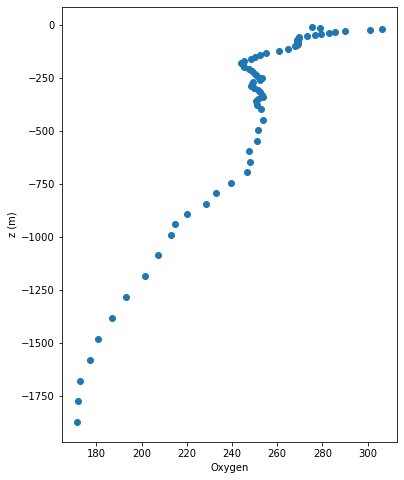

In [18]:
plt.figure(figsize=(6,8))
plt.xlabel('Oxygen')
plt.ylabel('z (m)')
plt.scatter(oxygen_rewrite[7], -z_rewrite[7])
plt.show()

In [19]:
median_oxygen_array = []

for x in oxygen_rewrite:
    if np.isnan(x).sum() == 1 and len(x) == 1:
        median_oxygen_array.append(np.nan)
    else:
        median_oxygen_array.append(np.median(x[~np.isnan(x)]))

In [20]:
import cartopy.crs as ccrs       # ccrs contains information about projections
import cartopy                   # contains all other cartopy functions/classes/methods
import cmocean

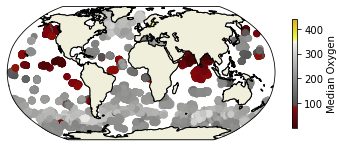

In [21]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
im = ax.scatter(ds3.lon.values, ds3.lat.values, c=median_oxygen_array, 
                transform=ccrs.PlateCarree(),cmap=cmocean.cm.oxy)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, edgecolor='black', zorder=1)
plt.colorbar(im, label='Median Oxygen', shrink=0.5)
fig.show()

### WOD types of data: 
- xbt: temperature
- pfl: similar to ctd, but more data, still MISMATCH dimension
- osd: CTD + Ox + trace (alkalinity, isotope) + wind, usually available for old data
- mrb: CTD
- gld: CTD with Ox
- drb: CTD with Ox
- ctd: CTD with Ox
- apb: CTD 

Ocean Station
Data – OSD; High-resolution Conductivity-Temperature-Depth – CTD; Mechanical/ Digital/ Micro
Bathythermograph – MBT; Expendable Bathythermograph – XBT; Surface – SUR; Autonomous
Pinniped Bathythermograph – APB; Moored Buoy – MRB; Profiling Float – PFL; Drifting Buoy –DRB; 
Undulating Oceanographic Recorder – UOR; and Glider – GLD. In the remainder of this
document, the following terms OSD, CTD, MBT, XBT, SUR, APB, MRB, PFL, DRB, UOR, and
GLD are used. 

Data description: https://www.ncei.noaa.gov/sites/default/files/2020-04/wodreadme_0.pdf 

Mabye Oxygen is the result of the removing flagged data -> False -> SOLVED!


In [100]:
for year in range(1960,2022):
    for sensor_type in ['ctd', 'pfl']:
        url_ds = request_data_from_url(year=year, sensor_type=sensor_type)
        if url_ds: #Only do this step if ds exist (not 0)
            ds = create_clean_dataset(url_ds)
            ds = trim_data_NWAtlantic(ds)  
            save_data(ds, year, sensor_type)

1960: No ctd data
1960: No pfl data
No Oxygen available in wod_ctd_1961
No Chlorophyll available in wod_ctd_1961


/tmp/ipykernel_121827/1487456673.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(var_rewrite_array)


1961: No pfl data
No Oxygen available in wod_ctd_1962
No Salinity available in wod_ctd_1962
No Chlorophyll available in wod_ctd_1962
1962: No pfl data
No Oxygen available in wod_ctd_1963
No Salinity available in wod_ctd_1963
No Chlorophyll available in wod_ctd_1963
1963: No pfl data
No Oxygen available in wod_ctd_1964
No Chlorophyll available in wod_ctd_1964
1964: No pfl data
1965: No ctd data
1965: No pfl data
No Oxygen available in wod_ctd_1966
No Chlorophyll available in wod_ctd_1966
1966: No pfl data
No Oxygen available in wod_ctd_1967
No Chlorophyll available in wod_ctd_1967
1967: No pfl data
No Oxygen available in wod_ctd_1968
No Chlorophyll available in wod_ctd_1968
1968: No pfl data
No Oxygen available in wod_ctd_1969
No Chlorophyll available in wod_ctd_1969
1969: No pfl data
No Oxygen available in wod_ctd_1970
No Chlorophyll available in wod_ctd_1970
1970: No pfl data
No Chlorophyll available in wod_ctd_1971
1971: No pfl data
No Chlorophyll available in wod_ctd_1972
1972: No p

In [98]:
ds['Salinity'][2]

array([   36.679, -9999.   ,    36.679, -9999.   , -9999.   , -9999.   ,
       -9999.   , -9999.   , -9999.   , -9999.   , -9999.   , -9999.   ,
       -9999.   ], dtype=float32)

In [90]:
ds['Temperature'][2]

array([19.444, 16.667, 16.111, 13.444, 11.944, 10.   ,  9.722,  8.611,
        8.333,  8.611,  7.889,  7.778,  7.778], dtype=float32)

In [84]:
saved_df = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_1969_ctd.csv')
saved_df.head()

,lat,lon,time,Temperature,Salinity,z
0,32.1833,-78.6000,1969-01-07 21:00:00.000000,[19.444 16.667 16.111 13.444 11.944 10. 9....,[ 36.679 -9999. 36.679 -9999. -9999...,[ 0. 48.8 61. 79.2 91.4 109.7 121.9 140...
1,30.4500,-71.3333,1969-01-15 01:00:00.000107,[22.222 21.111 20.111 19.889 19.444 19.222 19....,[ 34.9 32.4 31.5 -9999. -9999. -9999...,[ 0. 121.9 137.2 152.4 167.6 198.1 213.4 259...
2,30.1000,-74.3833,1969-01-17 06:59:59.999142,[20.389 20.389 20.111 20.111 20.556 20.722 19....,[-9999],[ 0. 6.1 15.2 137.2 143.3 149.4 228.6 231...
3,30.7333,-71.1667,1969-01-20 08:00:00.000858,[20.444 20.444 19.389 18.889 18.556 18.333 18....,[ 36.369 -9999. -9999. -9999. -9999...,[ 0. 121.9 152.4 182.9 213.4 243.8 274.3 304...
4,33.3667,-73.7833,1969-01-31 01:00:00.000107,[19.722 19.722 19.722 19.722 19.444 18.833 18....,[ 36.5 -9999. -9999. -9999. -9999. -9999...,[ 0. 30.5 61. 121.9 137.2 182.9 213.4 243...


In [80]:
np.where(np.isnan(ds['Salinity'][2]), -9999, ds['Salinity'][2])

array([   36.679, -9999.   ,    36.679, -9999.   , -9999.   , -9999.   ,
       -9999.   , -9999.   , -9999.   , -9999.   , -9999.   , -9999.   ,
       -9999.   ], dtype=float32)

In [63]:
ds['Salinity'][2]

array([36.679,    nan, 36.679,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan], dtype=float32)

In [32]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [34]:
saved_df = pd.read_csv('/shared/marn5895/data/HungJosiahProject/WOD_NWA_2019_ctd.csv')
from_np_array(saved_df['Temperature'][0])

array([2.24, 2.11, 2.16, 2.54, 2.47, 2.74, 2.69, 2.92, 3.23, 3.  , 3.46,
       3.42, 3.98, 4.81, 4.98, 5.09, 4.93])